# 최근접 이웃(K-Nearest Neighbor)
1. New Data와 모든 Train Set사이의 거리 측정
2. 유클리드 거리가 가까운 순으로 K개의 점을 이웃으로 갖는다.
3. K의 개의 점들중 가장 많이 속한 Class 를 찾는다.
4. NewData를 새로운 Class 에 할당한다.

## K 란 ?
- 이웃의 or 주변 데이터의 개수
- K 는 홀수로 설정 하는걸 추전
- K 값이 너무 작은경우 : 민감도가 높아서 잘못 예측할 확률이 높아짐 (overfitting)
- K 값이 너무 큰경우 : 분류나 예측 자체가 둔감해지기 때문에 결과가 좋지 않음 (underfitting)
- 기본값을 이용해 적절하게 찾아 나간다.(default=5)

## P_value
- 이웃 선택의 기준이 되는 거리 계산법
- Minkowski 거리법을 사용한다. 

## 주의
- 변수 값 범위 재조정
    - 각 feature 의 단위가 다르기 때문에 거리 측정시에 범위를 재조정 해줘야 한다.
    - 물렁도, 크기의 단위는 서로 다르기 때문에 같은 거리 측정 방식을 사용하면 안된다.

[모델 종류]
- KNeighborsClassifier() : Classification model
    - [참고](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
- KNeighborsRegressor() : Regression Model
    - [참고](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)

# KNeighborsClassifier() : Classification model
- n_neighbors : int
    - 이웃의 수인 K를 결정한다. default = 5 
- weights : {'uniform', 'distance'} or callable
    - 예측에 사용되는 가중 방법을 결정한다. default는 uniform이다. 
    - 'uniform' : 각각의 이웃이 모두 동일한 가중치를 갖는다. 
    - 'distance' : 거리가 가까울수록 더 높은 가중치를 가져 더 큰 영향을 미치게 된다.
    - callable : 사용자가 직접 정의한 함수를 사용할 수도 있다. 거리가 저장된 배열을 입력으로 받고 가중치가 저장된 배열을 반환하는 함수가 되어야 한다. 
-  algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} 
    - 가장 가까운 이웃들을 계산하는 데 사용하는 알고리즘을 결정한다. default는 auto이다. 
    - 'auto' : 입력된 훈련 데이터에 기반하여 가장 적절한 알고리즘을 사용한다. 
    - 'ball_tree' : Ball-Tree 구조를 사용한다. (Ball-Tree 설명 : https://nobilitycat.tistory.com/entry/ball-tree)
    - 'kd_tree' : KD-Tree 구조를 사용한다.
    - 'brute' : Brute-Force 탐색을 사용한다. 
- leaf_size : int
    - Ball-Tree나 KD-Tree의 leaf size를 결정한다. default값은 30이다.
    - 이는 트리를 저장하기 위한 메모리뿐만 아니라, 트리의 구성과 쿼리 처리의 속도에도 영향을 미친다. 
- p : int
    - 민코프스키 미터법(Minkowski)의 차수를 결정한다. 예를 들어 p = 1이면 맨해튼 거리(Manhatten distance), p = 2이면 유클리드 거리(Euclidean distance)이다. 

In [5]:
# sklearn 1.2.0 이상 사용시
# !pip install threadpoolctl==3.1.0
# !pip install lazypredict
# AttributeError: 'NoneType' object has no attribute 'split' 에러 발생시

In [7]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/tmp/ipykernel_2860/2441446269.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [17]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

In [18]:
import warnings
warnings.filterwarnings("ignore")

## K 최근접 이웃 분류
- 학습 과정 : Train Data Set을 저장
- k개의 데이터중 거리를 기준으로 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [19]:
iris = load_iris()

In [20]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
scaler = StandardScaler()
# minmaxscaler 와의 차이는?
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [23]:
# model 생성후 학습 (scaler 적용전의 Data)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9833333333333333
Test Data Score: 0.9


In [24]:
# model 생성후 학습 (scaler 적용된 Data)

model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.975
Test Data Score: 0.9


In [25]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x, y=y, cv=5, 
               n_jobs=multiprocessing.cpu_count())

/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

{'fit_time': array([0.0008769 , 0.00065589, 0.00071168, 0.00108242, 0.00108242]),
 'score_time': array([0.00243759, 0.00189137, 0.00269938, 0.00298238, 0.0029285 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [26]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x_train_scale, y=y_train, cv=5, 
               n_jobs=multiprocessing.cpu_count())

/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

{'fit_time': array([0.00056767, 0.00059199, 0.00065851, 0.00047326, 0.00049829]),
 'score_time': array([0.00169444, 0.00181723, 0.00151753, 0.00121045, 0.00132132]),
 'test_score': array([1.        , 0.95833333, 0.91666667, 0.91666667, 1.        ])}

In [27]:
param_grid = [{'n_neighbors':[3,5,7], # k 값  neighbors의 값 설정
               'weights': ['uniform', 'distance'], # 가중치 설정 uniform: 동일 가중치, distance 거리에 반비례하여 가중 
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}] # 자동이 아니라 종류별 알고리즘 테스트

In [28]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [29]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [30]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [31]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9800000000000001


In [32]:
gs.fit(x_train_scale,y_train)
gs.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [33]:
gs.best_estimator_.n_neighbors

3

In [34]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [35]:
# 2차원으로 차원축소후 KNeighborsClassifier 를 이용해 학습 결과를 확인해 보자. 
tsne = TSNE(n_components=2) 
x_comp = tsne.fit_transform(x)

In [36]:
x_comp.shape

(150, 2)

In [37]:
y.shape

(150,)

In [38]:
iris_comp_df = pd.DataFrame(data=x_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,7.730227,23.412514,0
1,6.681617,26.055721,0
2,7.803524,26.039455,0
3,7.383372,26.459234,0
4,7.316664,23.321148,0
...,...,...,...
145,-8.226277,-12.775729,2
146,-5.793462,-10.743815,2
147,-7.566318,-12.175673,2
148,-9.148674,-12.926963,2


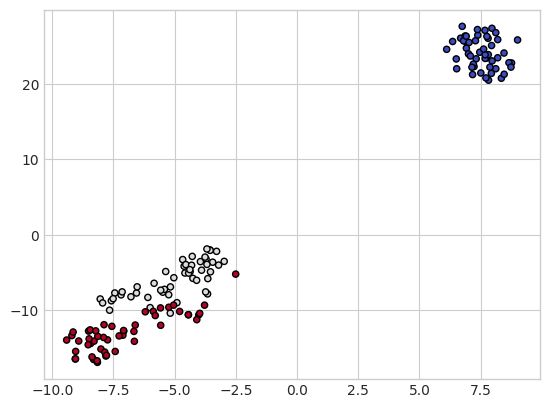

In [39]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [40]:
# 2차원 데이터로 학습
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

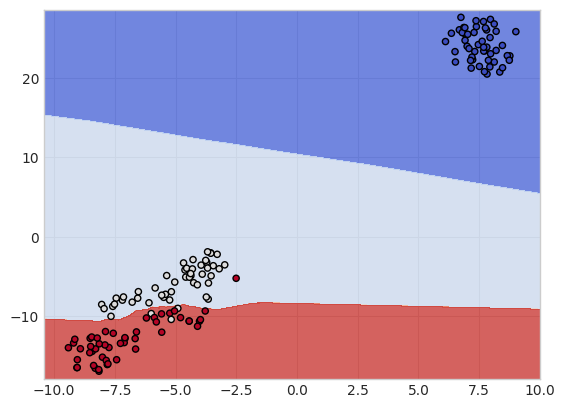

In [41]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')# y가 정답이므로color 는 정답으로 구분 해준다. 

### 유방암 데이터

In [42]:
cancer = load_breast_cancer()

In [43]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [44]:
x, y =cancer.data, cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [45]:
# train 데이터 확인
cancer_train_df = pd.DataFrame(x_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,16.35,23.29,109.00,840.4,0.09742,0.1497,0.1811,0.08773,0.2175,0.06218,...,31.03,129.3,1165.0,0.1415,0.4665,0.7087,0.2248,0.4824,0.09614,0
1,14.87,16.67,98.64,682.5,0.11620,0.1649,0.1690,0.08923,0.2157,0.06768,...,27.37,127.1,1095.0,0.1878,0.4480,0.4704,0.2027,0.3585,0.10650,0
2,15.66,23.20,110.20,773.5,0.11090,0.3114,0.3176,0.13770,0.2495,0.08104,...,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190,0
3,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.07070,...,25.47,89.0,527.4,0.1287,0.2250,0.2216,0.1105,0.2226,0.08486,1
4,20.13,28.25,131.20,1261.0,0.09780,0.1034,0.1440,0.09791,0.1752,0.05533,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0


In [46]:
# test 데이터 확인
cancer_test_df = pd.DataFrame(x_test, columns=cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.13600,0.1636,0.07162,0.04074,0.2434,0.08488,1
1,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.11790,0.1879,0.15440,0.03846,0.1652,0.07722,1
2,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.2167,0.15650,0.07530,0.2636,0.07676,1
3,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,15.97,83.74,510.5,0.15480,0.2390,0.21020,0.08958,0.3016,0.08523,1
4,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,0.06714,...,22.04,71.08,357.4,0.14610,0.2246,0.17830,0.08333,0.2691,0.09479,1


In [47]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [48]:
# scale 전 점수
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9472527472527472
Test Data Score: 0.9122807017543859


In [49]:
# scale 후 점수
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.9802197802197802
Test Data Score: 0.9736842105263158


In [53]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [54]:
cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs =multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

{'fit_time': array([0.00190783, 0.00217938, 0.00197864, 0.00188136, 0.00170612]),
 'score_time': array([0.00708771, 0.00989199, 0.01023293, 0.00661373, 0.00610399]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [55]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [60]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [61]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    # n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [62]:
gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [63]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9701288619779538


In [64]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(x)

In [65]:
cancer_comp_df = pd.DataFrame(data=x_comp)
cancer_comp_df['target']=y

,0,1,target
0,32.276093,-6.214263,0
1,34.679672,-4.759349,0
2,31.710985,-1.002671,0
3,-11.798086,-7.505445,0
4,32.482750,1.359196,0


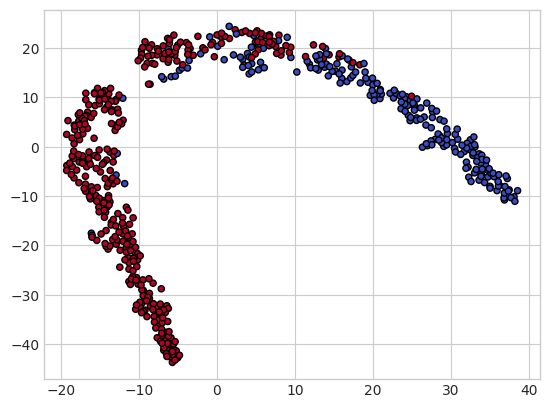

In [66]:
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [67]:
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

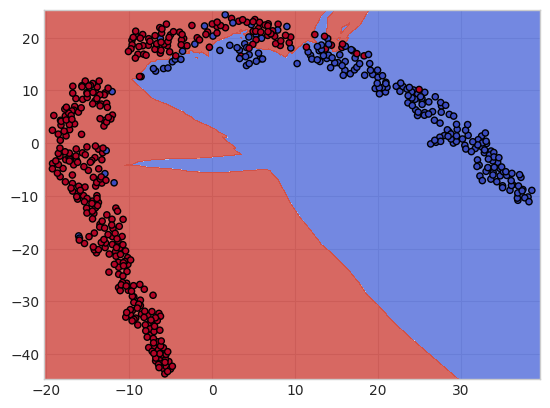

In [68]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, s=20, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 와인 데이터

In [80]:
wine = load_wine()

In [81]:
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [82]:
x, y = wine.data, wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [83]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [84]:
# scale 전 점수
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.8028169014084507
Test Data Score: 0.6666666666666666


In [85]:
# scale 후 점수
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.9859154929577465
Test Data Score: 0.9444444444444444


In [86]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [87]:
cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs =multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

{'fit_time': array([0.00112844, 0.00103498, 0.00148964, 0.00111747, 0.00151968]),
 'score_time': array([0.00160742, 0.00247788, 0.00274682, 0.00223565, 0.00232387]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [88]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [89]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [94]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,    
    verbose=True,
    # n_jobs=multiprocessing.cpu_count()
)

In [95]:
gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [96]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9665079365079364


In [97]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [98]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9665079365079364


In [99]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(x)

In [100]:
wine_comp_df = pd.DataFrame(x_comp)
wine_comp_df['target'] = y
wine_comp_df.head()

,0,1,target
0,-7.798897,-7.694354,0
1,-7.608948,-7.408205,0
2,-9.630475,-9.011866,0
3,-11.740733,-10.967765,0
4,-1.524874,-1.608963,0


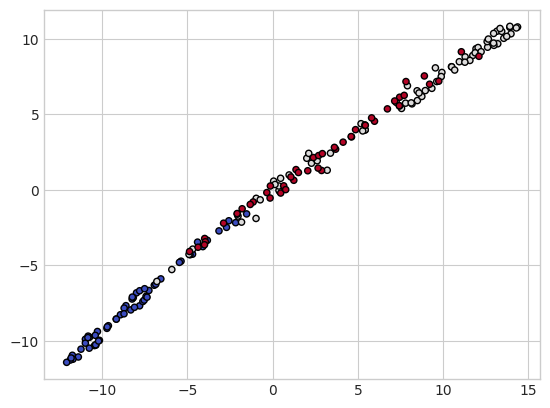

In [101]:
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [107]:
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

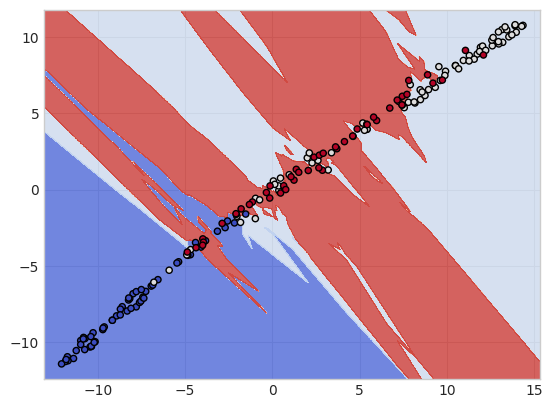

In [108]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, s=20, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## k 최근접 이웃 회귀

- 주변데이터의 평균을 이용해 예측값을 결정
- 데이터 범위 밖의 새로운 데이터는 예측 불가능

### 보스턴 주택 가격 데이터

In [109]:
boston = load_boston()

In [110]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [111]:
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [112]:
boston_train_df = pd.DataFrame(x_train, columns = boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3
1,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
2,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
3,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88,14.5
4,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
400,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
401,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
402,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09,20.4


In [113]:
boston_test_df = pd.DataFrame(data=x_test, columns = boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.05059,0.0,4.49,0.0,0.4490,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62,23.9
1,9.91655,0.0,18.10,0.0,0.6930,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
2,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
3,2.73397,0.0,19.58,0.0,0.8710,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.10659,80.0,1.91,0.0,0.4130,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6


In [114]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [115]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.6922279331295791
Test Data Score: 0.5345761370063946


In [116]:
model = KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.8542270899455262
Test Data Score: 0.7869436603496424


In [117]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [118]:
cross_validate(
    estimator = estimator,
    X=x, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.4s finished


{'fit_time': array([0.00134754, 0.00310135, 0.00138068, 0.00136638, 0.00139403]),
 'score_time': array([0.00132298, 0.00404215, 0.00110054, 0.00194693, 0.00189638]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [119]:
cross_validate(
    estimator = estimator,
    X=x_train_scale, y=y_train,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00348759, 0.00230598, 0.00326967, 0.00326943, 0.00533772]),
 'score_time': array([0.00217748, 0.00415444, 0.00214553, 0.00153303, 0.0028429 ]),
 'test_score': array([0.56246678, 0.78556467, 0.82026705, 0.69515966, 0.78097215])}

In [120]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [121]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [122]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [123]:
gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [124]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [125]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.4973060611762845


In [126]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

gs.fit(x_train_scale, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [127]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.7937873194772525


In [128]:
tsne = TSNE(n_components=1)
x_comp = tsne.fit_transform(x)

In [129]:
boston_comp_df = pd.DataFrame(data=x_comp)
boston_comp_df['target']=y
boston_comp_df.head()

,0,target
0,-17.973680,24.0
1,-43.025272,21.6
2,-39.286552,34.7
3,-40.209835,33.4
4,-40.469906,36.2


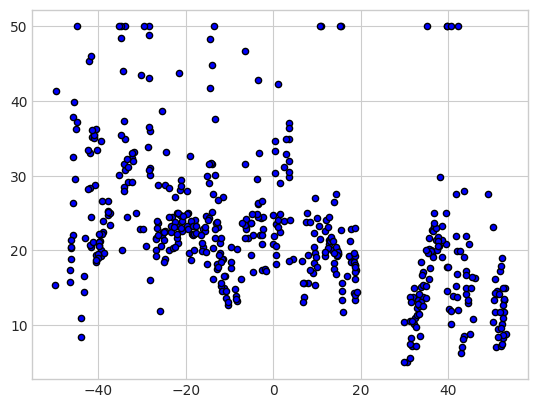

In [130]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [131]:
model = KNeighborsRegressor()
model.fit(x_comp, y)
predict = model.predict(x_comp)

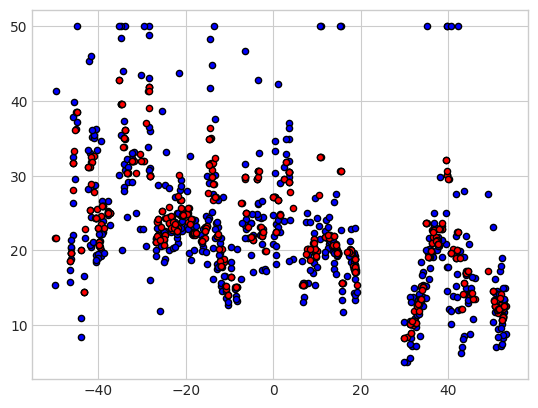

In [132]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [86]:
california = fetch_california_housing()

In [87]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
x, y = california.data, california.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

### cf. 최적 k값 찾기(보스턴 주택 가격 데이터)

In [53]:
boston = load_boston()
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [54]:
model =KNeighborsRegressor()
model.fit(x_train, y_train)

print('scale 전 Train Data Score: {model.score(x_train, y_train)}')
print('scale 전 Test Data Score: {model.score(x_test, y_test)}')

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

model =KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print('scale 후 Train Data Score: {model.score(x_train_scale, y_train)}')
print('scale 후 Test Data Score: {model.score(x_test_scale, y_test)}')

scale 전 Train Data Score: {model.score(x_train, y_train)}
scale 전 Test Data Score: {model.score(x_test, y_test)}
scale 후 Train Data Score: {model.score(x_train_scale, y_train)}
scale 후 Test Data Score: {model.score(x_test_scale, y_test)}


Text(0, 0.5, 'test score(accuracy)')

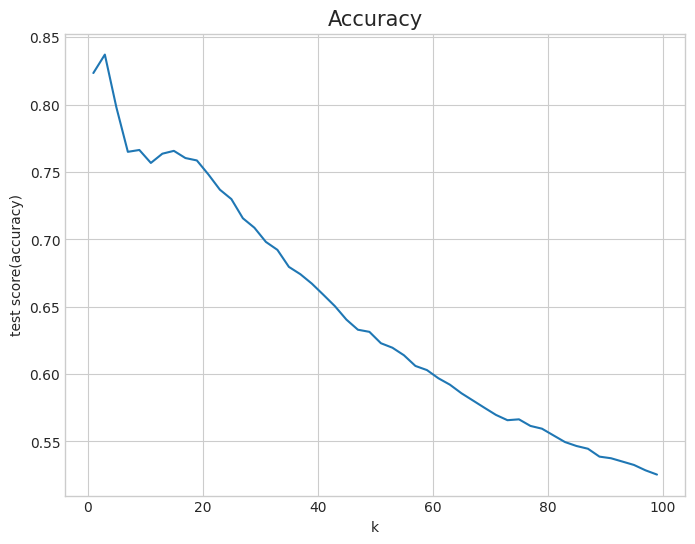

In [55]:
k_list = range(1,101, 2)
accuracies = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_scale, y_train)
    accuracies.append(model.score(x_test_scale, y_test))
    
plt.figure(figsize=(8,6))    
plt.plot(k_list, accuracies)
plt.title('Accuracy', fontsize=15)
plt.xlabel('k')
plt.ylabel('test score(accuracy)')

In [56]:
df = pd.DataFrame(k_list, accuracies).reset_index()
df.columns = ['accuracy', 'k']
df.sort_values(by='accuracy', ascending=False)

,accuracy,k
1,0.837058,3
0,0.823363,1
2,0.797985,5
4,0.766270,9
7,0.765618,15
3,0.764900,7
6,0.763514,13
8,0.760295,17
9,0.758504,19
5,0.756656,11
